In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset_path = "/content/drive/MyDrive/Vegetable Images"

In [21]:
dataset_path

'/content/drive/MyDrive/Vegetable Images'

In [22]:
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
 count = 0
 dirs = os.listdir("/content/drive/MyDrive/Vegetable Images")

 for dir in dirs:
  dir_path = os.path.join("/content/drive/MyDrive/Vegetable Images", dir)
  if os.path.isdir(dir_path):
    files = list(os.listdir(dir_path))
    print(f"{dir} Folder has {len(files)}images")
    count += len(files)

 print(f"Image folder has {count}images")

Capsicum Folder has 1000images
Cauliflower Folder has 1000images
Radish Folder has 1000images
Pumpkin Folder has 1000images
Potato Folder has 1000images
Cucumber Folder has 1000images
Bean Folder has 1000images
Brinjal Folder has 1000images
Cabbage Folder has 1000images
Broccoli Folder has 1000images
Papaya Folder has 1000images
Tomato Folder has 1000images
Carrot Folder has 1000images
Bottle_Gourd Folder has 1000images
Bitter_Gourd Folder has 1000images
Image folder has 15000images


In [24]:
base_dir = "/content/drive/MyDrive/Vegetable Images"
img_size = 180
batch = 32

In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = "training",
    batch_size = batch,
    image_size = (img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
    batch_size = batch,
    image_size = (img_size, img_size))

Found 15000 files belonging to 15 classes.
Using 12000 files for training.
Found 15000 files belonging to 15 classes.
Using 3000 files for validation.


In [26]:
vegetable_names = train_ds.class_names
vegetable_names


['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [27]:
import matplotlib.pyplot as plt


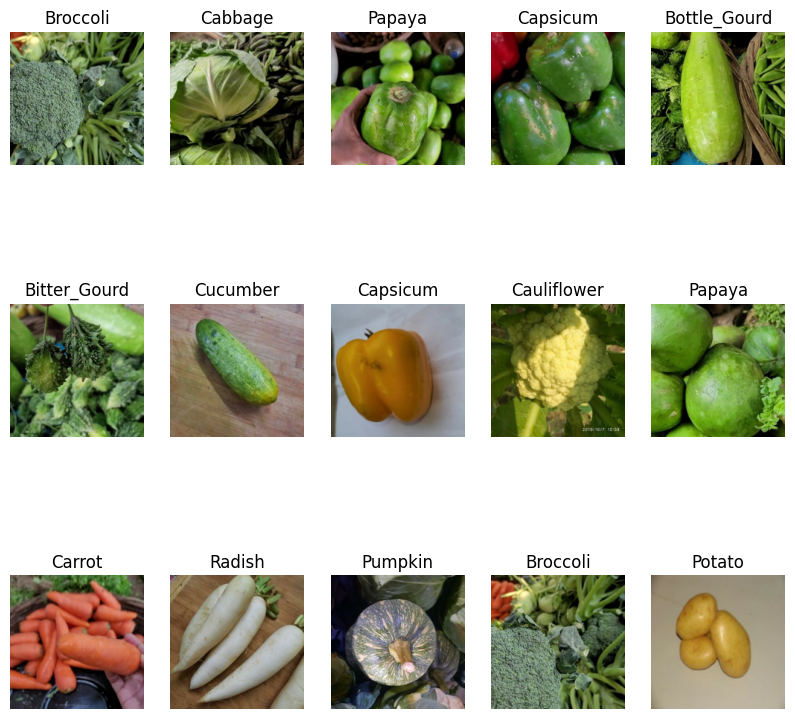

In [28]:
i = 0
plt.figure(figsize = (10,10))

for images, labels in train_ds.take(5):
  for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(vegetable_names[labels[i]])
    plt.axis("off")

In [29]:
 AUTOTUNE = tf.data.AUTOTUNE

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [31]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [32]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape =(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1 )
])

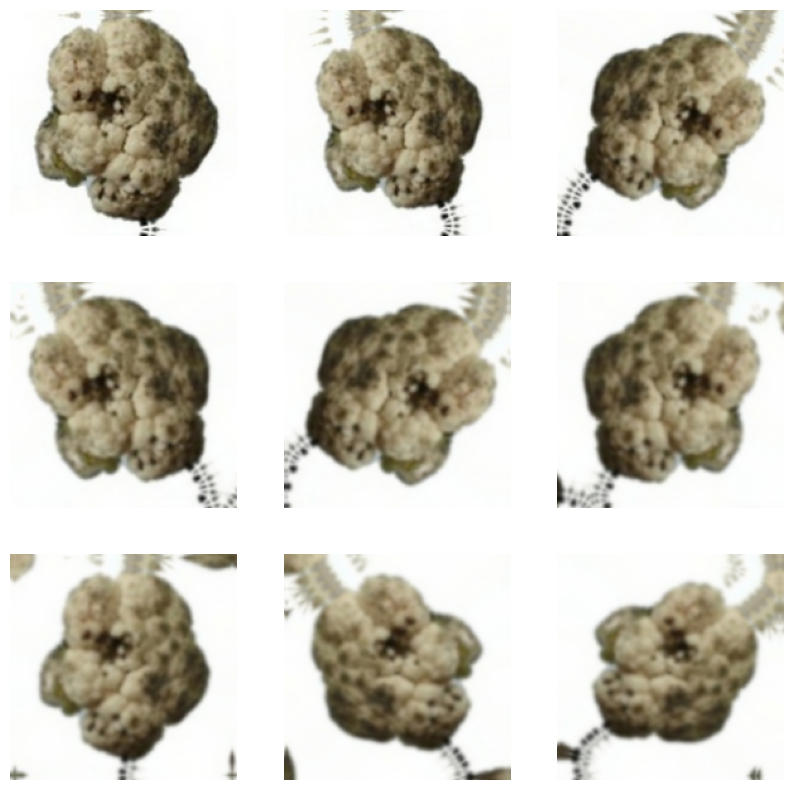

In [33]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    images = data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [34]:
 model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3, padding = "same", activation = "relu"),
    MaxPooling2D(),
    Conv2D(32,3, padding = "same", activation = "relu"),
    MaxPooling2D(),
    Conv2D(64,4, padding = "same", activation = "relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(5)
])

In [46]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,003,621 (15.27 MB)

 Trainable params: 4,003,621 (15.27 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(train_ds, epochs=15, validation_data = val_ds)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.8648 - loss: 0.4275 - val_accuracy: 0.8473 - val_loss: 0.4716
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.8991 - loss: 0.3226 - val_accuracy: 0.8847 - val_loss: 0.3752
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.9185 - loss: 0.2593 - val_accuracy: 0.9040 - val_loss: 0.3044
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.9210 - loss: 0.2471 - val_accuracy: 0.8567 - val_loss: 0.4540
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.9345 - loss: 0.2233 - val_accuracy: 0.8987 - val_loss: 0.3855
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.9437 - loss: 0.1746 - val_accuracy: 0.9270 - val_loss: 0.2625
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.9506 - loss: 0.1484 - val_accuracy: 0.9263 - val_loss: 0.2573
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.9526 - loss: 0.1567 - val_accu

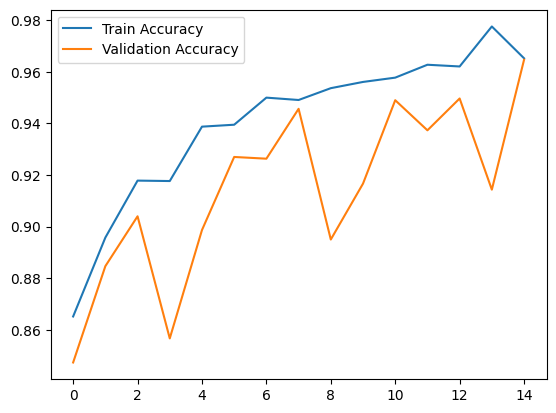

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train Accuracy') # Changed model_history to history
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy') # Changed model_history to history
plt.legend()
plt.show()

In [51]:
def classify_images (image_path):
  input_images = tf.keras.utils.load_img(image_path,target_size = (180,180))
  input_image_array = tf.keras.utils.img_to_array(input_images) # Changed input_image to input_images
  input_image_exp_dim = tf.expand_dims(input_image_array,0)

  prediction = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(prediction[0])  # Changed predictions to prediction
  outcome = "The Image belong to " + vegetable_names[np.argmax(result)]+ " with a score of " + str(np.max(result)*100) # Changed results to result, added spaces for clarity
  return outcome

In [58]:
classify_images("/content/cabbage_.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'The Image belong to Potato with a score of 97.62569665908813'

In [59]:
classify_images("/content/potato.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'The Image belong to Potato with a score of 52.9268741607666'

In [60]:
classify_images("/content/tomato.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'The Image belong to Tomato with a score of 85.92281341552734'

In [61]:
classify_images("/content/broccoli.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


'The Image belong to Capsicum with a score of 71.77408933639526'

In [62]:
classify_images("/content/carrot.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'The Image belong to Cauliflower with a score of 99.73635077476501'

In [ ]:
classify_images("/content/carrot.jpeg")

In [64]:
classify_images("/content/cucomber.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


'The Image belong to Bean with a score of 96.53038382530212'

In [69]:
model.save("veg_class_model.keras")